In [2]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 71.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 14.4 MB/s eta 0:00:00


In [3]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.9 MB/s eta 0:00:00:00:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling tensorboard-2.15.1:
      Successfully uninstalled tensorboard-2.15.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, whic

In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.models import Sequential, model_from_json  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from math import ceil
from sklearn.preprocessing import LabelEncoder

In [5]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

df = pd.read_csv('/kaggle/input/fer2013/fer2013.csv')


X = np.array([np.fromstring(image, dtype=int, sep=' ') for image in df['pixels']])
X = X.reshape(-1, 48, 48, 1)  # Reshape images to 48x48 grayscale
X = np.concatenate([X, X, X], axis=-1)  # Convert grayscale to RGB
X = X.astype('float32') / 255.0  # Normalize pixel values between 0 and 1

y = pd.get_dummies(df['emotion']).values  # One-hot encode labels

# Split the dataset into training, validation, and testing sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define ResNet model with pre-trained weights (transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


I0000 00:00:1711987458.560752     100 service.cc:145] XLA service 0x7ebdf004b180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1711987458.560793     100 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1711987458.560797     100 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  9/393 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1451 - loss: 2.5324   

I0000 00:00:1711987463.186341     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


393/393 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.2232 - loss: 1.9102 - val_accuracy: 0.2554 - val_loss: 1.7845
Epoch 2/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2754 - loss: 1.7585 - val_accuracy: 0.2970 - val_loss: 1.7372
Epoch 3/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2859 - loss: 1.7382 - val_accuracy: 0.2826 - val_loss: 1.7546
Epoch 4/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3032 - loss: 1.7225 - val_accuracy: 0.2409 - val_loss: 1.7977
Epoch 5/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3128 - loss: 1.7036 - val_accuracy: 0.3149 - val_loss: 1.6877
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2916 - loss: 1.7185
Test Loss: 1.6946698427200317, Test Accuracy: 0.30572065711021423


Epoch 1/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.3147 - loss: 1.6910 - val_accuracy: 0.3195 - val_loss: 1.6781
Epoch 2/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3229 - loss: 1.6817 - val_accuracy: 0.3305 - val_loss: 1.6951
Epoch 3/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3365 - loss: 1.6646 - val_accuracy: 0.3190 - val_loss: 1.6922
Epoch 4/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3346 - loss: 1.6649 - val_accuracy: 0.3426 - val_loss: 1.6664
Epoch 5/5
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3459 - loss: 1.6467 - val_accuracy: 0.3180 - val_loss: 1.6744


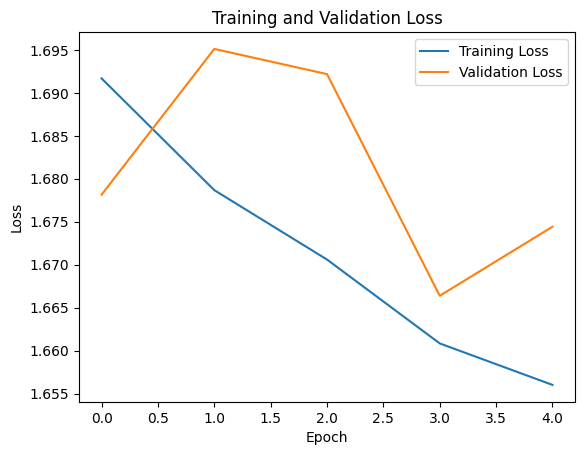

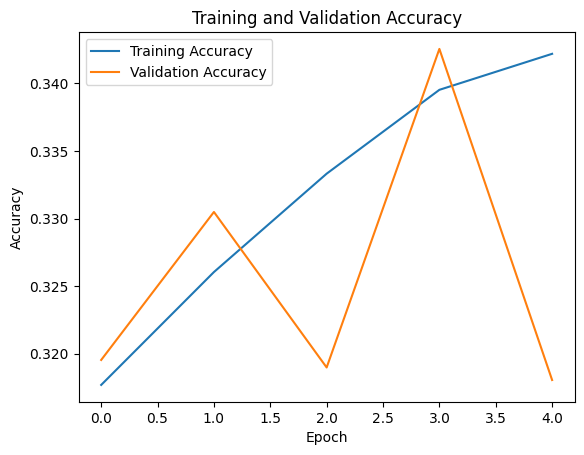

In [6]:
import matplotlib.pyplot as plt

# Train the model and save the history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [7]:
pip install databricks-sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.5/465.5 kB 12.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


2024/04/01 16:06:03 INFO mlflow.utils.credentials: No valid Databricks credentials found, please enter your credentials...


Databricks Host (should begin with https://):  https://community.cloud.databricks.com/
Username:  chiruvolu@iitbhilai.ac.in
Password:  ·········


2024/04/01 16:07:40 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


In [9]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.callbacks import History

# Set the MLflow experiment
mlflow.set_experiment("/mlflow-tf-keras-resnet")

# Log parameters
mlflow.log_param("epochs", 5)

# Train the model and log metrics
history = History()
model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[history])

# Log metrics
for epoch, loss in enumerate(history.history['loss'], 1):
    mlflow.log_metric("train_loss_epoch_" + str(epoch), loss)
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    mlflow.log_metric("train_accuracy_epoch_" + str(epoch), accuracy)
for epoch, val_loss in enumerate(history.history['val_loss'], 1):
    mlflow.log_metric("val_loss_epoch_" + str(epoch), val_loss)
for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
    mlflow.log_metric("val_accuracy_epoch_" + str(epoch), val_accuracy)

# End the MLflow run
mlflow.end_run()


Epoch 1/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3306 - loss: 1.6728 - val_accuracy: 0.3463 - val_loss: 1.6671
Epoch 2/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3282 - loss: 1.6762 - val_accuracy: 0.3095 - val_loss: 1.7091
Epoch 3/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3358 - loss: 1.6614 - val_accuracy: 0.3474 - val_loss: 1.6647
Epoch 4/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3459 - loss: 1.6514 - val_accuracy: 0.3517 - val_loss: 1.6563
Epoch 5/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3458 - loss: 1.6561 - val_accuracy: 0.3398 - val_loss: 1.6782


In [10]:
import matplotlib.pyplot as plt
import mlflow
import mlflow.tensorflow
from tensorflow.keras.callbacks import History
import os

# Set the MLflow experiment
mlflow.set_experiment("/mlflow-tf-keras-resnet")

# Log parameters
mlflow.log_param("epochs", 5)

# Train the model and log metrics
history = History()
model.fit(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val), callbacks=[history])

# Log metrics
for epoch, loss in enumerate(history.history['loss'], 1):
    mlflow.log_metric("train_loss_epoch_" + str(epoch), loss)
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    mlflow.log_metric("train_accuracy_epoch_" + str(epoch), accuracy)
for epoch, val_loss in enumerate(history.history['val_loss'], 1):
    mlflow.log_metric("val_loss_epoch_" + str(epoch), val_loss)
for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
    mlflow.log_metric("val_accuracy_epoch_" + str(epoch), val_accuracy)

# Save example images to a directory
example_images_dir = 'example_images'
os.makedirs(example_images_dir, exist_ok=True)
for i in range(5):  # Save 5 example images
    image_path = os.path.join(example_images_dir, f"example_image_{i}.png")
    # Assuming X_train contains images in numpy array format
    image = X_train[i] * 255.0  # Denormalize the image
    image = image.astype('uint8')  # Convert to uint8
    # Save the image
    plt.imsave(image_path, image.squeeze(), cmap='gray')

# Log example images as artifacts
mlflow.log_artifacts(example_images_dir, artifact_path="example_images")

# End the MLflow run
mlflow.end_run()


Epoch 1/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3435 - loss: 1.6447 - val_accuracy: 0.3485 - val_loss: 1.6404
Epoch 2/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3526 - loss: 1.6344 - val_accuracy: 0.3299 - val_loss: 1.6610
Epoch 3/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3587 - loss: 1.6308 - val_accuracy: 0.3418 - val_loss: 1.6444
Epoch 4/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3566 - loss: 1.6283 - val_accuracy: 0.3413 - val_loss: 1.6500
Epoch 5/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3586 - loss: 1.6224 - val_accuracy: 0.3440 - val_loss: 1.6486


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define ResNet model with pre-trained weights (transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)  # Increased units in Dense layer
predictions = Dense(7, activation='softmax')(x)
model_variation_1 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_variation_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_variation_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)  # Decreased batch size


Epoch 1/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.2219 - loss: 1.9490 - val_accuracy: 0.2586 - val_loss: 1.8186
Epoch 2/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.2712 - loss: 1.7642 - val_accuracy: 0.3030 - val_loss: 1.7283
Epoch 3/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2917 - loss: 1.7393 - val_accuracy: 0.3004 - val_loss: 1.7344
Epoch 4/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3018 - loss: 1.7178 - val_accuracy: 0.3240 - val_loss: 1.6826
Epoch 5/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3239 - loss: 1.6896 - val_accuracy: 0.3227 - val_loss: 1.6772


Epoch 1/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.3214 - loss: 1.6910 - val_accuracy: 0.3338 - val_loss: 1.6760
Epoch 2/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3247 - loss: 1.6775 - val_accuracy: 0.3483 - val_loss: 1.6613
Epoch 3/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3328 - loss: 1.6656 - val_accuracy: 0.3496 - val_loss: 1.6569
Epoch 4/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3401 - loss: 1.6575 - val_accuracy: 0.3496 - val_loss: 1.6556
Epoch 5/5
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3443 - loss: 1.6575 - val_accuracy: 0.3504 - val_loss: 1.6507


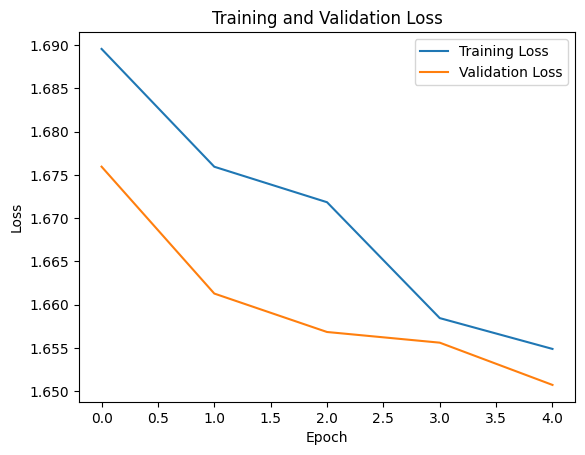

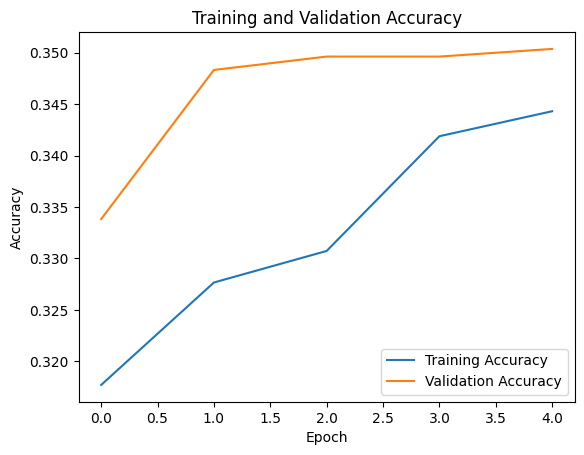

In [12]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model_variation_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [13]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import History
import os

# Set the MLflow experiment
mlflow.set_experiment("/mlflow-tf-keras-resnet")

# Log parameters
mlflow.log_param("epochs", 5)
mlflow.log_param("dense_units", 2048)  # Log the number of units in the Dense layer

# Define ResNet model with pre-trained weights (transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)  # Increased units in Dense layer
predictions = Dense(7, activation='softmax')(x)
model_variation_1 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_variation_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and log metrics
history = History()
model_variation_1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=32, callbacks=[history])

# Log metrics
for epoch, loss in enumerate(history.history['loss'], 1):
    mlflow.log_metric("train_loss_epoch_" + str(epoch), loss)
for epoch, accuracy in enumerate(history.history['accuracy'], 1):
    mlflow.log_metric("train_accuracy_epoch_" + str(epoch), accuracy)
for epoch, val_loss in enumerate(history.history['val_loss'], 1):
    mlflow.log_metric("val_loss_epoch_" + str(epoch), val_loss)
for epoch, val_accuracy in enumerate(history.history['val_accuracy'], 1):
    mlflow.log_metric("val_accuracy_epoch_" + str(epoch), val_accuracy)

# Save example images to a directory
example_images_dir = 'example_images'
os.makedirs(example_images_dir, exist_ok=True)
for i in range(5):  # Save 5 example images
    image_path = os.path.join(example_images_dir, f"example_image_{i}.png")
    # Assuming X_train contains images in numpy array format
    image = X_train[i] * 255.0  # Denormalize the image
    image = image.astype('uint8')  # Convert to uint8
    # Save the image
    plt.imsave(image_path, image.squeeze(), cmap='gray')

# Log example images as artifacts
mlflow.log_artifacts(example_images_dir, artifact_path="example_images")

# End the MLflow run
mlflow.end_run()


Epoch 1/2
785/785 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.2352 - loss: 1.9529 - val_accuracy: 0.2779 - val_loss: 1.7611
Epoch 2/2
785/785 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2732 - loss: 1.7625 - val_accuracy: 0.2840 - val_loss: 1.7431


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [14]:
from tensorflow.keras.optimizers import RMSprop

# Define ResNet model with pre-trained weights (transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model_variation_2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with RMSprop optimizer and different loss function
model_variation_2.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_variation_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)


Epoch 1/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.2082 - loss: 2.1435 - val_accuracy: 0.2588 - val_loss: 1.8082
Epoch 2/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2596 - loss: 1.7822 - val_accuracy: 0.2770 - val_loss: 1.7748
Epoch 3/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2750 - loss: 1.7622 - val_accuracy: 0.2939 - val_loss: 1.7332
Epoch 4/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2880 - loss: 1.7367 - val_accuracy: 0.3021 - val_loss: 1.7573
Epoch 5/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2929 - loss: 1.7308 - val_accuracy: 0.2995 - val_loss: 1.7029
Epoch 6/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3082 - loss: 1.7055 - val_accuracy: 0.3002 - val_loss: 1.7404
Epoch 7/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3075 - loss: 1.7109 - val_accuracy: 0.3214 - val_loss: 1.6945
Epoch 8/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3126 - loss: 1.6995 - val_acc

In [15]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import os

# Set the MLflow experiment
mlflow.set_experiment("/mlflow-tf-resnet-transfer-learning")

# Log parameters
mlflow.log_param("epochs", 15)
mlflow.log_param("batch_size", 64)

# Define ResNet model with pre-trained weights (transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model_variation_2 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with RMSprop optimizer and categorical cross-entropy loss function
model_variation_2.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_variation_2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Log metrics
for metric_name, values in history.history.items():
    for epoch, value in enumerate(values, 1):
        mlflow.log_metric(f"{metric_name}_epoch_{epoch}", value)

# Save the model
mlflow.tensorflow.save_model(model_variation_2, "model")

# End the MLflow run
mlflow.end_run()


Epoch 1/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.2150 - loss: 2.1908 - val_accuracy: 0.2675 - val_loss: 1.7981
Epoch 2/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.2635 - loss: 1.7748 - val_accuracy: 0.2733 - val_loss: 1.7595
Epoch 3/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2706 - loss: 1.7649 - val_accuracy: 0.2198 - val_loss: 1.8200
Epoch 4/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2850 - loss: 1.7406 - val_accuracy: 0.3190 - val_loss: 1.7158
Epoch 5/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2985 - loss: 1.7269 - val_accuracy: 0.2924 - val_loss: 1.8354
Epoch 6/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.2985 - loss: 1.7136 - val_accuracy: 0.2976 - val_loss: 1.7077
Epoch 7/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3099 - loss: 1.7082 - val_accuracy: 0.3091 - val_loss: 1.6918
Epoch 8/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.3101 - loss: 1.7010 - val_acc

2024/04/01 16:16:26 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.
/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Epoch 1/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.3223 - loss: 1.7279 - val_accuracy: 0.3777 - val_loss: 1.5943
Epoch 2/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4036 - loss: 1.5414 - val_accuracy: 0.3974 - val_loss: 1.5452
Epoch 3/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4335 - loss: 1.4860 - val_accuracy: 0.3899 - val_loss: 1.5571
Epoch 4/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4472 - loss: 1.4302 - val_accuracy: 0.4180 - val_loss: 1.5157
Epoch 5/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4678 - loss: 1.3898 - val_accuracy: 0.4057 - val_loss: 1.5434
Epoch 6/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4804 - loss: 1.3456 - val_accuracy: 0.4100 - val_loss: 1.5346
Epoch 7/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5126 - loss: 1.2915 - val_accuracy: 0.4289 - val_loss: 1.5161
Epoch 8/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5284 - loss: 1.2440 - val_acc

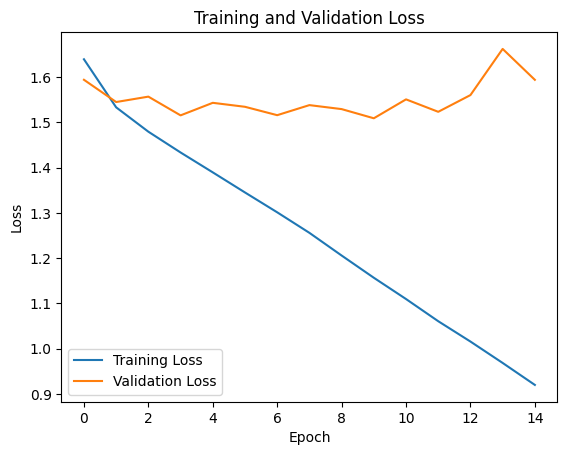

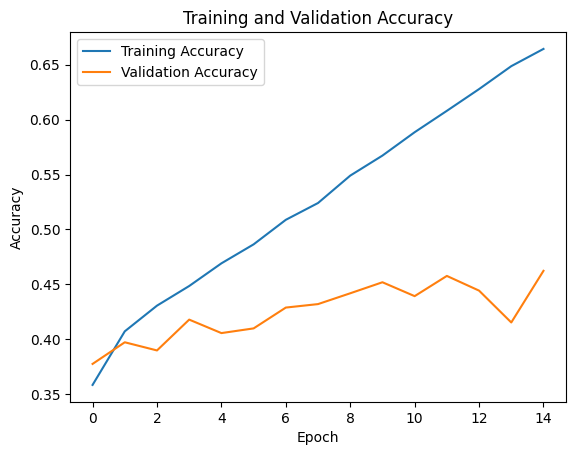

NameError: name 'model_variation_8' is not defined

In [17]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os

# Set the MLflow experiment
mlflow.set_experiment("/mlflow-tf-vgg16-transfer-learning")

# Log parameters
mlflow.log_param("epochs", 15)
mlflow.log_param("batch_size", 64)

# Define VGG16 model with pre-trained weights (transfer learning)
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model_variation_3 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with RMSprop optimizer and categorical cross-entropy loss function
model_variation_3.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store history
history = model_variation_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Plot and save training and validation curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('loss_curve.png')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy_curve.png')
plt.show()

# Log metrics
for metric_name, values in history.history.items():
    for epoch, value in enumerate(values, 1):
        mlflow.log_metric(f"{metric_name}_epoch_{epoch}", value)

# Save the model and log as artifact
mlflow.tensorflow.save_model(model_variation_3, "new_model_path")

mlflow.log_artifact("loss_curve.png", artifact_path="metrics")
mlflow.log_artifact("accuracy_curve.png", artifact_path="metrics")

# End the MLflow run
mlflow.end_run()


Epoch 1/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.2990 - loss: 1.7337 - val_accuracy: 0.3658 - val_loss: 1.6125
Epoch 2/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.3875 - loss: 1.5767 - val_accuracy: 0.3855 - val_loss: 1.5704
Epoch 3/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4131 - loss: 1.5164 - val_accuracy: 0.4078 - val_loss: 1.5458
Epoch 4/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4328 - loss: 1.4709 - val_accuracy: 0.4111 - val_loss: 1.5352
Epoch 5/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4574 - loss: 1.4144 - val_accuracy: 0.4208 - val_loss: 1.5156
Epoch 6/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4768 - loss: 1.3581 - val_accuracy: 0.4224 - val_loss: 1.5223
Epoch 7/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4961 - loss: 1.3081 - val_accuracy: 0.3977 - val_loss: 1.6146
Epoch 8/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.5264 - loss: 1.2506 - val_acc

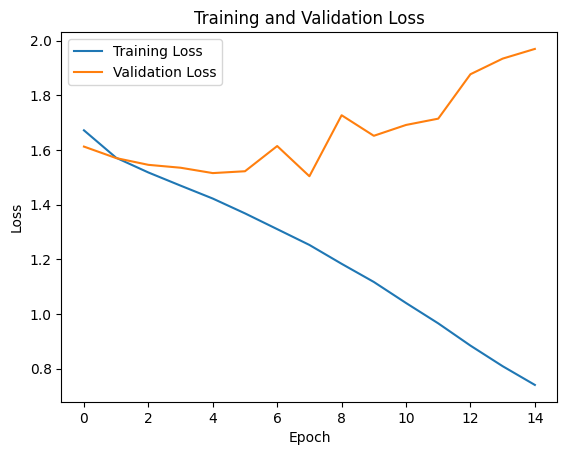

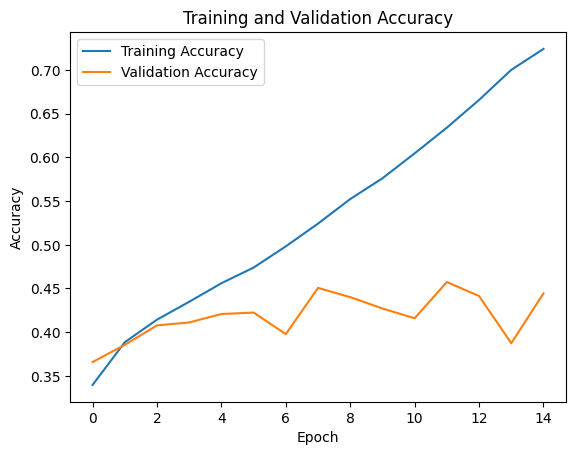

2024/04/01 16:25:16 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [18]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os

# Set the MLflow experiment
mlflow.set_experiment("/mlflow-tf-vgg16-transfer-learning")

# Log parameters
mlflow.log_param("epochs", 15)
mlflow.log_param("batch_size", 64)

# Define VGG16 model with pre-trained weights (transfer learning)
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)  # Additional hidden layer
x = Dense(256, activation='relu')(x)  # Additional hidden layer
x = Dense(128, activation='relu')(x)  # Additional hidden layer
x = Dense(64, activation='relu')(x)   # Additional hidden layer
predictions = Dense(7, activation='softmax')(x)
vgg_162 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with RMSprop optimizer and categorical cross-entropy loss function
vgg_162.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store history
history = vgg_162.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Plot and save training and validation curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('loss_curve.png')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy_curve.png')
plt.show()

# Log metrics
for metric_name, values in history.history.items():
    for epoch, value in enumerate(values, 1):
        mlflow.log_metric(f"{metric_name}_epoch_{epoch}", value)

# Save the model and log as artifact
mlflow.tensorflow.save_model(vgg_162, "vgg_162")
mlflow.log_artifact("loss_curve.png", artifact_path="metrics")
mlflow.log_artifact("accuracy_curve.png", artifact_path="metrics")

# End the MLflow run
mlflow.end_run()


Epoch 1/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.3230 - loss: 1.7203 - val_accuracy: 0.3810 - val_loss: 1.6145
Epoch 2/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4021 - loss: 1.5446 - val_accuracy: 0.3961 - val_loss: 1.5362
Epoch 3/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.4281 - loss: 1.4791 - val_accuracy: 0.3974 - val_loss: 1.5520
Epoch 4/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.4513 - loss: 1.4300 - val_accuracy: 0.4146 - val_loss: 1.5242
Epoch 5/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4705 - loss: 1.3891 - val_accuracy: 0.3914 - val_loss: 1.5668
Epoch 6/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4923 - loss: 1.3395 - val_accuracy: 0.4393 - val_loss: 1.4846
Epoch 7/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5157 - loss: 1.2891 - val_accuracy: 0.4328 - val_loss: 1.5057
Epoch 8/15
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5352 - loss: 1.2384 - val_acc

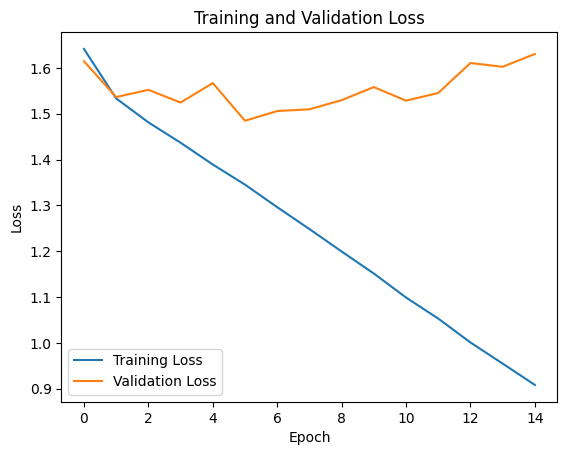

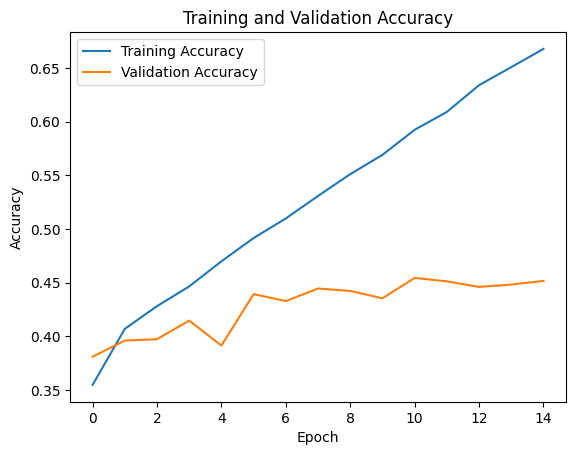

2024/04/01 16:38:12 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [21]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import os
import time

# Set the MLflow experiment
mlflow.set_experiment("/mlflow-tf-vgg16-transfer-learning")

# Log parameters
mlflow.log_param("epochs", 15)
mlflow.log_param("batch_size", 64)

# Define VGG16 model with pre-trained weights (transfer learning)
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model_variation_3 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with RMSprop optimizer and categorical cross-entropy loss function
model_variation_3.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store history
history = model_variation_3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=64)

# Plot and save training and validation curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('loss_curve.png')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('accuracy_curve.png')
plt.show()

# Log metrics
for metric_name, values in history.history.items():
    for epoch, value in enumerate(values, 1):
        mlflow.log_metric(f"{metric_name}_epoch_{epoch}", value)

# Save the model with a different name
timestamp = int(time.time())
mlflow.tensorflow.save_model(model_variation_3, f"model_{timestamp}")

mlflow.log_artifact("loss_curve.png", artifact_path="metrics")
mlflow.log_artifact("accuracy_curve.png", artifact_path="metrics")

# End the MLflow run
mlflow.end_run()


Epoch 1/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.2359 - loss: 1.8389 - val_accuracy: 0.2562 - val_loss: 1.8118
Epoch 2/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2602 - loss: 1.7863 - val_accuracy: 0.2809 - val_loss: 1.7588
Epoch 3/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.2728 - loss: 1.7633 - val_accuracy: 0.2798 - val_loss: 1.7515
Epoch 4/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.2831 - loss: 1.7368 - val_accuracy: 0.2957 - val_loss: 1.7247
Epoch 5/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.2917 - loss: 1.7288 - val_accuracy: 0.2720 - val_loss: 1.7641
Epoch 6/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2955 - loss: 1.7252 - val_accuracy: 0.2772 - val_loss: 1.7692
Epoch 7/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2918 - loss: 1.7224 - val_accuracy: 0.3114 - val_loss: 1.6948
Epoch 8/25
393/393 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3066 - loss: 1.7085 - val_acc

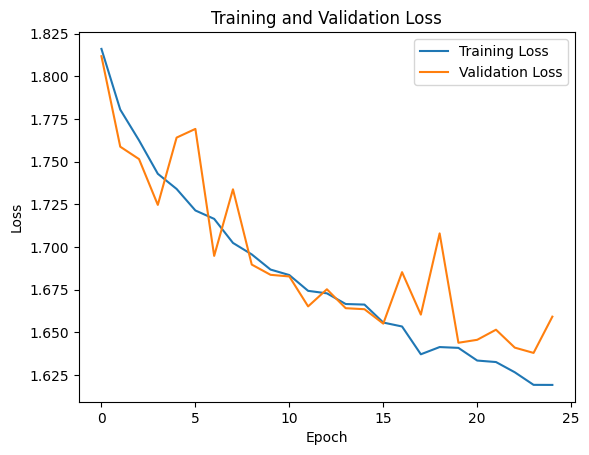

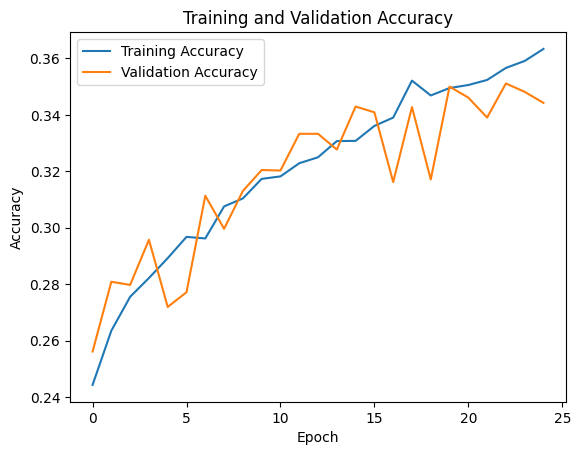

2024/04/01 16:30:15 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


In [20]:
import mlflow
import mlflow.tensorflow
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os



mlflow.log_param("epochs", 15)
mlflow.log_param("batch_size", 64)

# Define ResNet50 model with pre-trained weights (transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)  # Hidden layer 1
x = Dense(1024, activation='relu')(x)  # Hidden layer 2
x = Dense(512, activation='relu')(x)   # Hidden layer 3
x = Dense(256, activation='relu')(x)   # Hidden layer 4
x = Dense(128, activation='relu')(x)   # Hidden layer 5
predictions = Dense(7, activation='softmax')(x)
resnet_5 = Model(inputs=base_model.input, outputs=predictions)

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and categorical cross-entropy loss function
resnet_5.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = resnet_5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=64)

# Plot and save training and validation curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.savefig('resnet5_loss_curve.png')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.savefig('resnet5_accuracy_curve.png')
plt.show()

# Log metrics
for metric_name, values in history.history.items():
    for epoch, value in enumerate(values, 1):
        mlflow.log_metric(f"{metric_name}_epoch_{epoch}", value)

# Save the model and log as artifact
mlflow.tensorflow.save_model(resnet_5, "resnet_5")
mlflow.log_artifact("resnet5_loss_curve.png", artifact_path="metrics")
mlflow.log_artifact("resnet5_accuracy_curve.png", artifact_path="metrics")

# End the MLflow run
mlflow.end_run()


In [24]:
# Assuming you have trained models
model_1_predictions = model.predict(X_val)
model_2_predictions = model_variation_1.predict(X_val)
model_3_predictions = model_variation_2.predict(X_val)

# Create a list containing predictions from all models
models_predictions = [model_1_predictions, model_2_predictions, model_3_predictions]


169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
